In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from pymongo import MongoClient
import copy
import math
from enum import Enum
import requests
import json
import pprint
from os import listdir
import dill
dill.settings['recurse'] = True
from pathos.multiprocessing import ProcessingPool as Pool
import time
from pqdict import PQDict
from matplotlib import colors

userRatingPath = "./data/"

class CollectibleType(Enum):
  All = 1
  Hands = 2
  Feet = 3
  Left = 4
  Right = 5
  LeftHand = 6
  RightHand = 7
  LeftFoot = 8
  RightFoot = 9

gravity = 9.81

client = MongoClient('localhost', 27017)

db = client['beatfork']

versions = db.versions.find()

userRatings = {}
for fileName in listdir(userRatingPath):
  file = open(userRatingPath + fileName)
  userRating = json.load(file)
  id = userRating['_id']['levelId'] + '/' + userRating['_id']['versionId']
  if not id in userRatings:
    userRatings[id] = {
      'overallDifficulty': [],
      'chunkDifficulties': []
    }
  userRatings[id]['overallDifficulty'].append(userRating['overallDifficulty'])
  userRatings[id]['chunkDifficulties'].append(userRating['chunkDifficulties'])
for version in userRatings:
  userRatings[version]['overallDifficulty'] = pd.DataFrame(userRatings[version]['overallDifficulty'])
  userRatings[version]['chunkDifficulties'] = pd.DataFrame(userRatings[version]['chunkDifficulties'])

sns.set(rc={'figure.figsize': (10, 3)})

def calcDistanceXY(posA, posB):
  return ( (posA['x'] - posB['x']) ** 2 + (posA['y'] - posB['y']) ** 2 ) ** (1 / 2)

def calcDistanceZ(posA, posB):
  return abs(posA['z'] - posB['z'])

c:\Users\luis\python_environments\beatfork\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


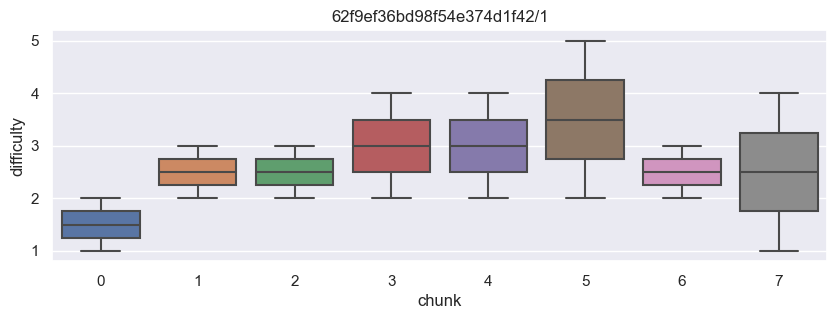

c:\Users\luis\python_environments\beatfork\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


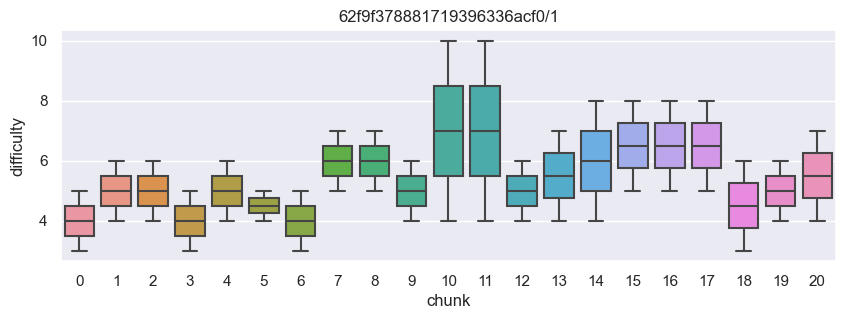

c:\Users\luis\python_environments\beatfork\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


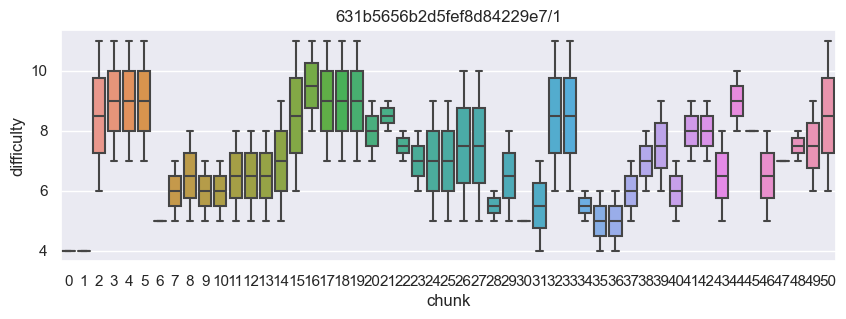

c:\Users\luis\python_environments\beatfork\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


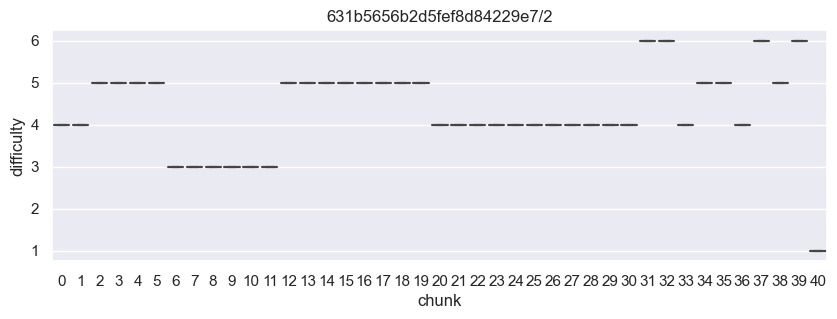

c:\Users\luis\python_environments\beatfork\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


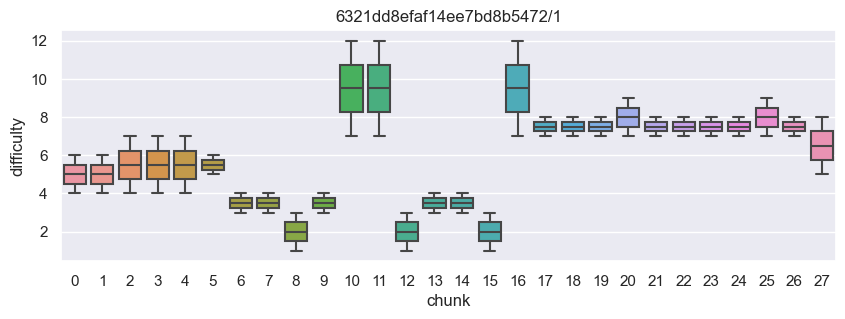

c:\Users\luis\python_environments\beatfork\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


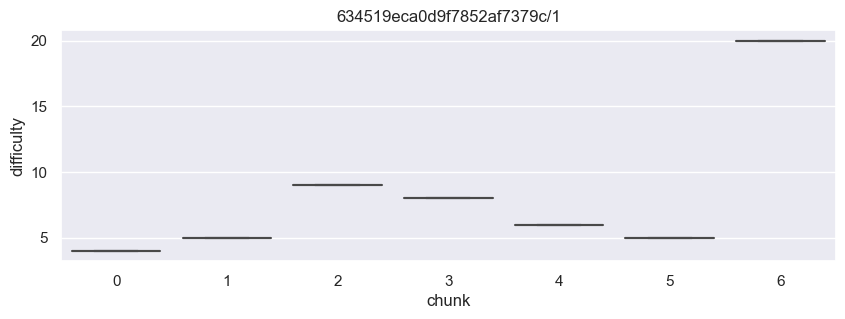

In [14]:
for version in userRatings:
  g = sns.boxplot(
    data=userRatings[version]['chunkDifficulties']
  )
  g.set_title(version)
  g.set_xlabel("chunk")
  g.set_ylabel("difficulty")
  plt.show()

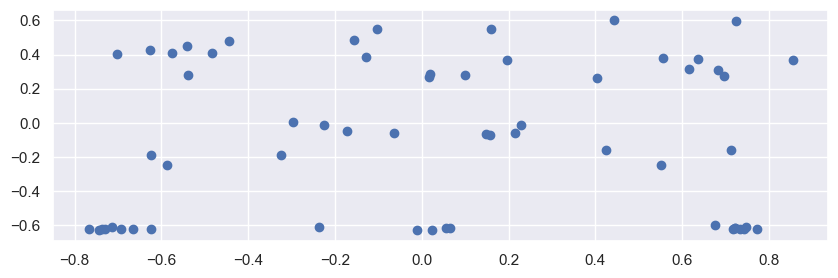

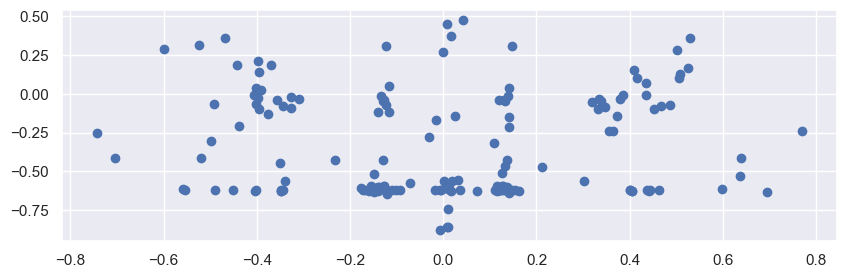

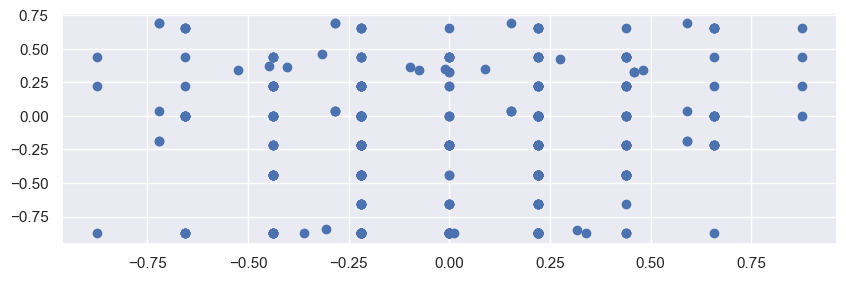

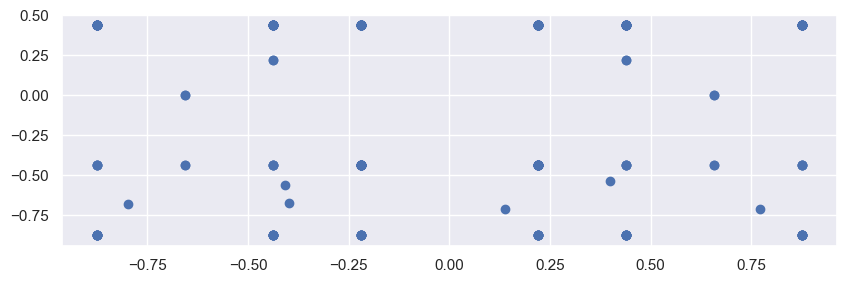

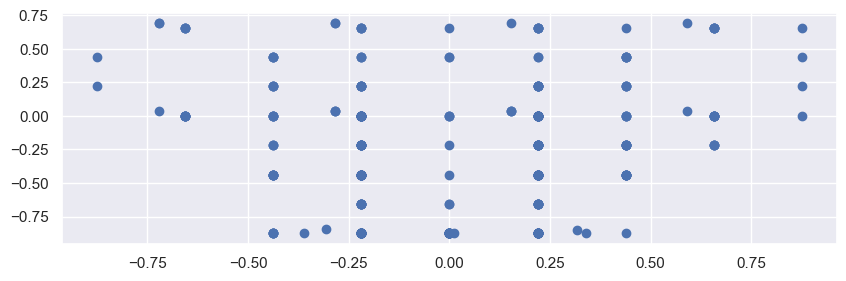

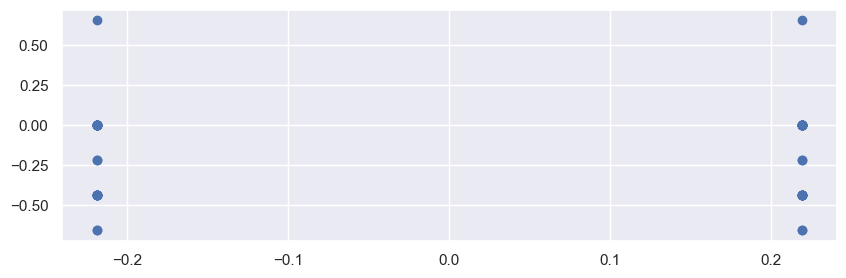

In [15]:
def plotXYOccurence(version):

  x = np.array(list(map(lambda obj:
    obj['position']['x']
  , version['objects'])))
  y = np.array(list(map(lambda obj:
    obj['position']['y']
  , version['objects'])))

  fig, ax = plt.subplots()

  ax.scatter(x, y, vmin=-1, vmax=1)

  plt.show()

for version in copy.deepcopy(versions):
  plotXYOccurence(version)

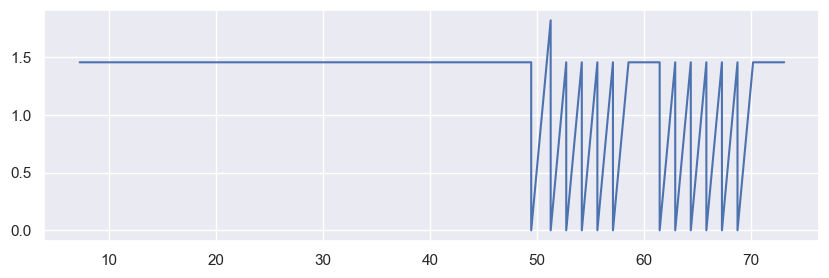

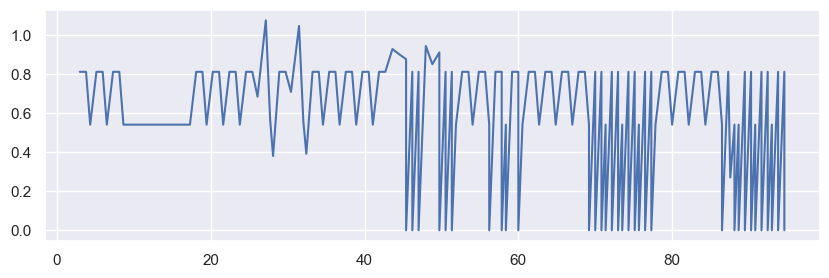

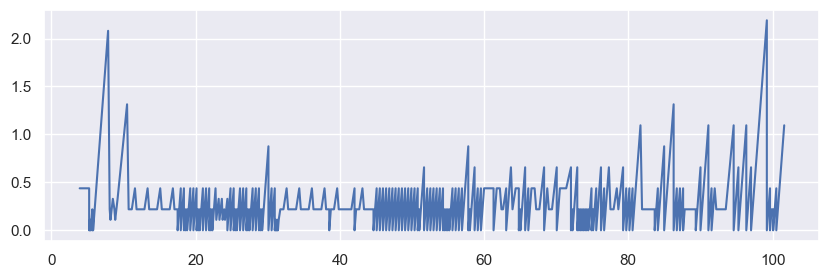

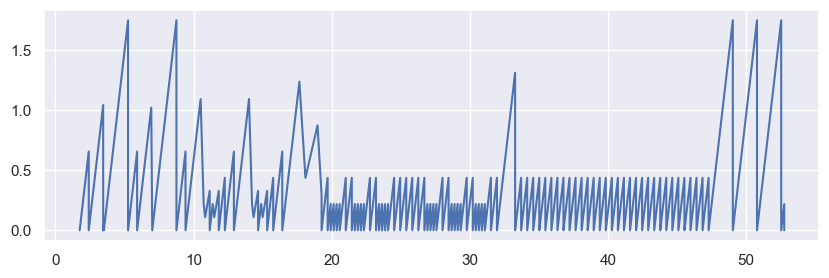

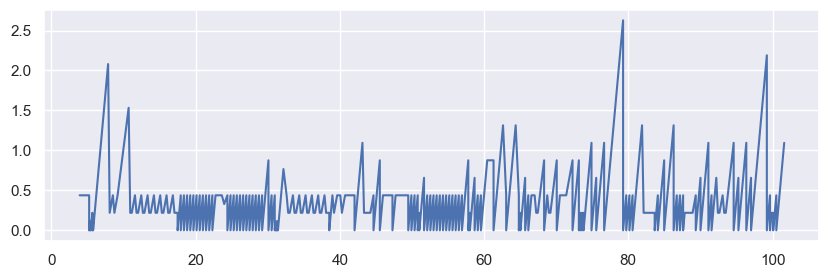

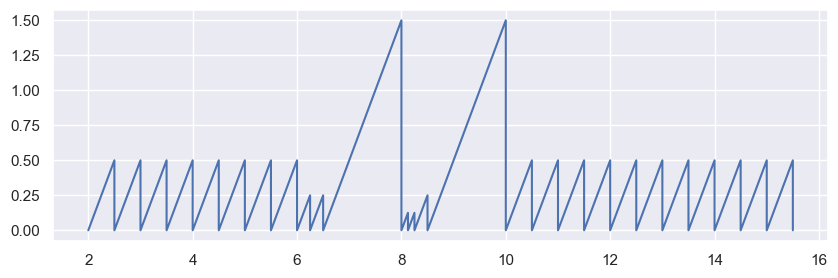

In [16]:
def plotZDistance(version):

  zDistanceBetweenBlocks = []
  lastZ = version['objects'].pop(0)['position']['z']
  for obj in version['objects']:
    zDistanceBetweenBlocks.append(obj['position']['z'] - lastZ)
    lastZ = obj['position']['z']

  x = np.array(list(map(lambda obj:
    obj['position']['z']
  , version['objects'])))
  y = np.array(zDistanceBetweenBlocks)

  fig, ax = plt.subplots()

  ax.plot(x, y)

  plt.show()

for version in copy.deepcopy(versions):
  plotZDistance(version)

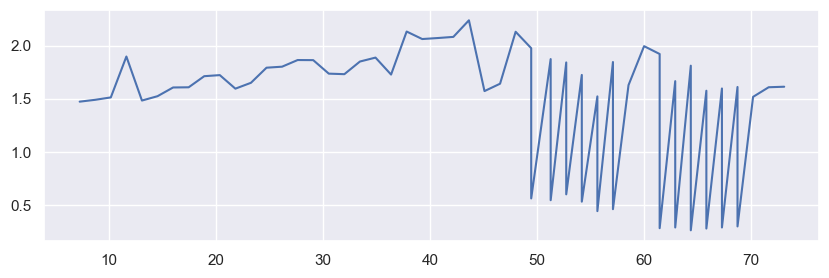

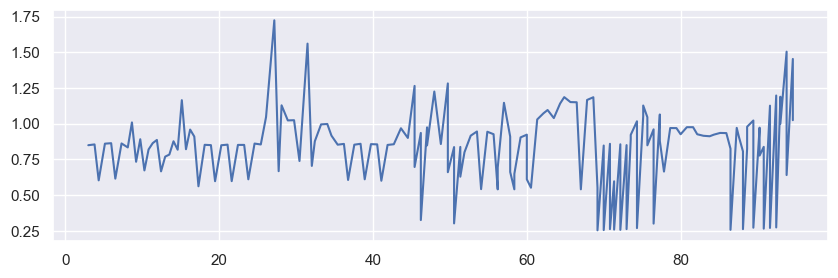

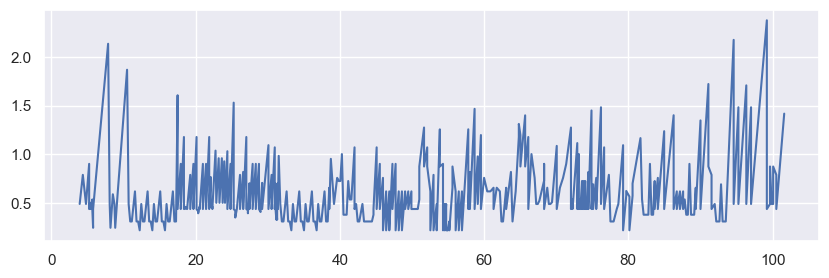

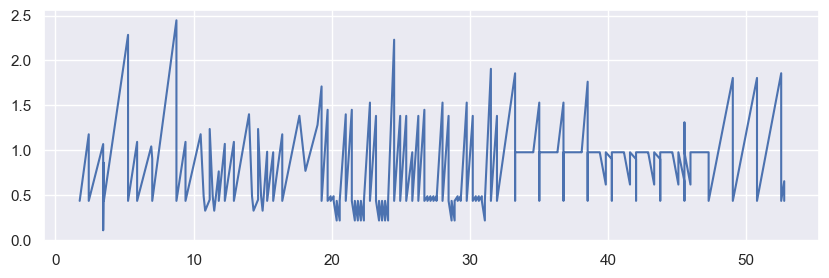

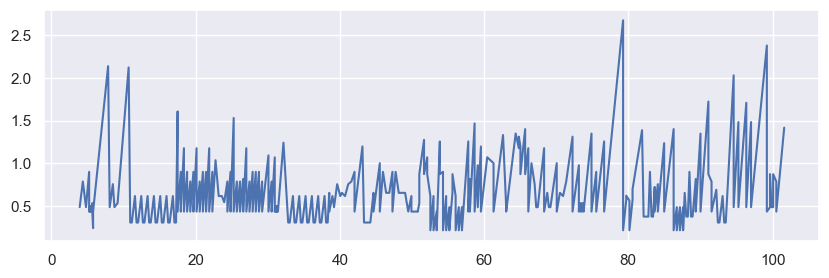

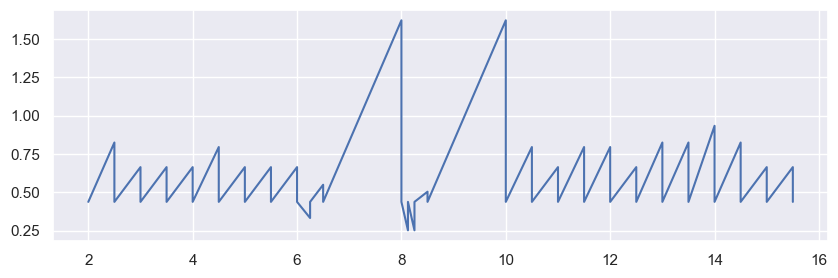

In [17]:
def plotDistance(version):

  distanceBetweenBlocks = []
  lastPosition = version['objects'].pop(0)['position']
  for obj in version['objects']:
    distanceBetweenBlocks.append((
      (obj['position']['x'] - lastPosition['x']) ** 2 +
      (obj['position']['y'] - lastPosition['y']) ** 2 +
      (obj['position']['z'] - lastPosition['z']) ** 2 ) ** 0.5)
    lastPosition = obj['position']

  x = np.array(list(map(lambda obj:
    obj['position']['z']
  , version['objects'])))
  y = np.array(distanceBetweenBlocks)

  fig, ax = plt.subplots()

  ax.plot(x, y)

  plt.show()

for version in copy.deepcopy(versions):
  plotDistance(version)

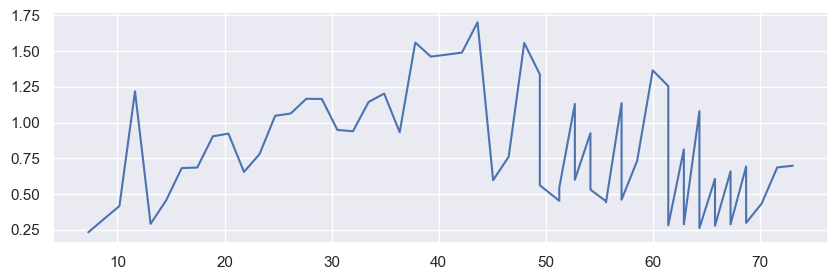

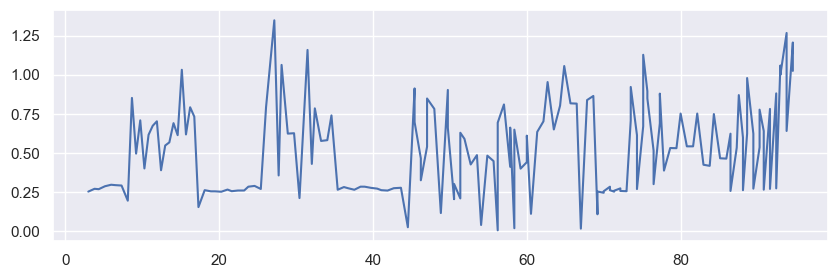

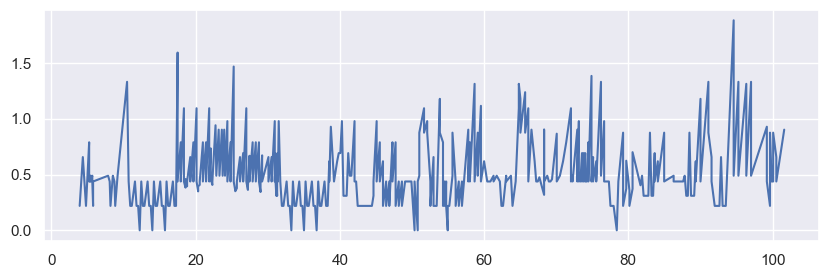

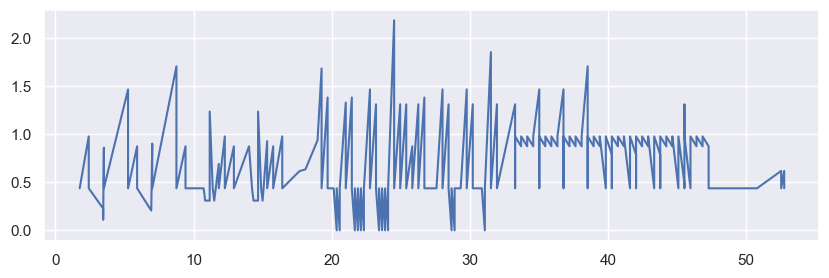

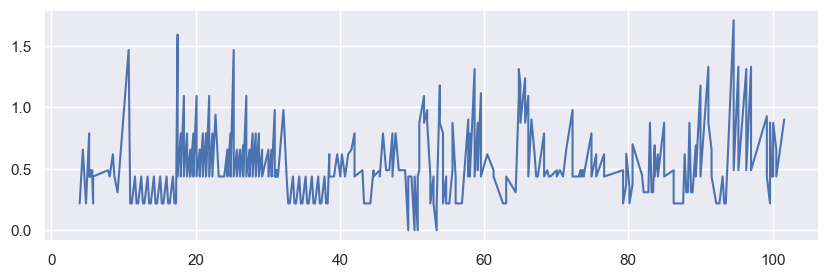

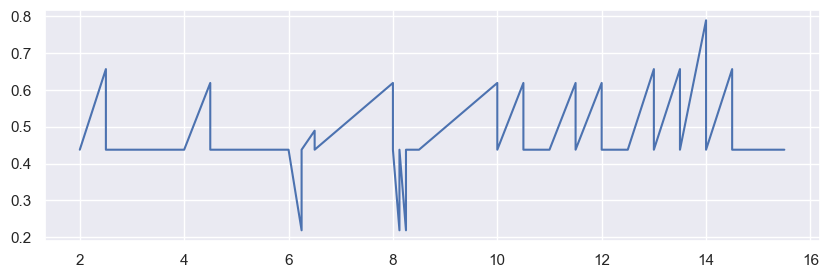

In [18]:
def plotXYDistance(version):

  distanceBetweenBlocks = []
  lastPosition = version['objects'].pop(0)['position']
  for obj in version['objects']:
    distanceBetweenBlocks.append((
      (obj['position']['x'] - lastPosition['x']) ** 2 +
      (obj['position']['y'] - lastPosition['y']) ** 2 ) ** 0.5)
    lastPosition = obj['position']

  x = np.array(list(map(lambda obj:
    obj['position']['z']
  , version['objects'])))
  y = np.array(distanceBetweenBlocks)

  fig, ax = plt.subplots()

  ax.plot(x, y)

  plt.show()

for version in copy.deepcopy(versions):
  plotXYDistance(version)

62f9ef36bd98f54e374d1f42/1


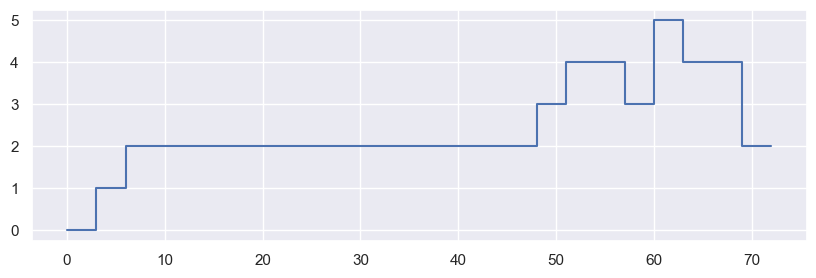

62f9f378881719396336acf0/1


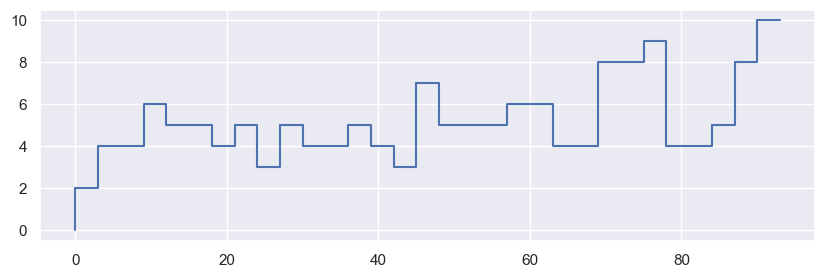

631b5656b2d5fef8d84229e7/1


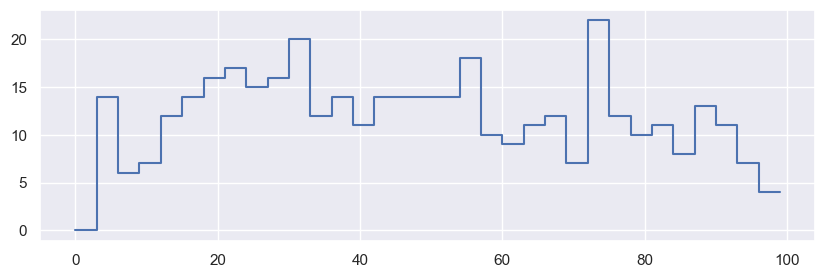

6321dd8efaf14ee7bd8b5472/1


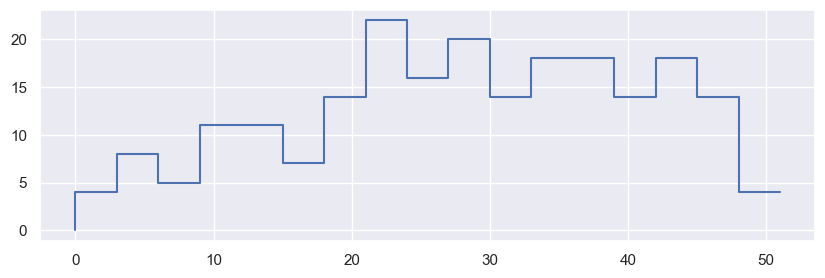

631b5656b2d5fef8d84229e7/2


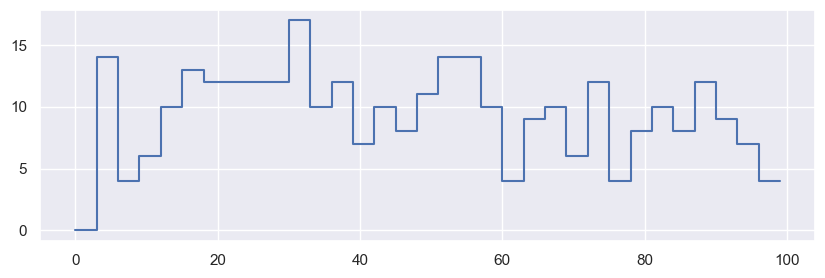

634519eca0d9f7852af7379c/1


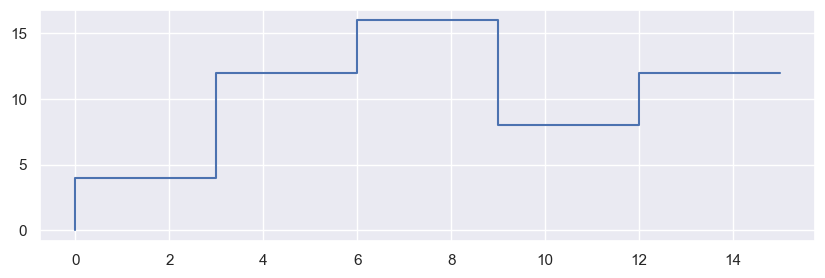

In [19]:
def plotDensity(version):
  secondsPerInterval = 3

  objects = version['objects']
  end = objects[-1]['position']['z']
  density = []
  for i in range(0, math.ceil(end / secondsPerInterval) * secondsPerInterval, secondsPerInterval):
    obstaclesInInterval = 0
    while len(objects) > 0 and objects[0]['position']['z'] < i:
      obstaclesInInterval += 1
      objects.pop(0)
    density.append(obstaclesInInterval)

  x = np.arange(0, math.ceil(end / secondsPerInterval) * secondsPerInterval, secondsPerInterval)
  y = np.array(density)

  fig, ax = plt.subplots()

  ax.step(x, y)

  plt.show()

for version in copy.deepcopy(versions):
  print(str(version['_id']['levelId']) + '/' + str(version['_id']['versionId']))
  plotDensity(version)

In [20]:
# Sampling (like in signal processing)
# 
# Sampled naive algorithm is still very slow even with low chunk sizes as 8 it takes about 10s to run per level version.
# Converting to JS failed, because JS cannot deal with soo many recursions without further steps.
# Maybe rewrite iteratively. Does that solve the problem though?
# Definitely need more performance for larger chunk sizes.

chunkSize = 8
overlap = 0

def split(myList, chunkSize, overlap):
  for i in range (0, len(myList), chunkSize):
    yield myList[i: i + chunkSize + overlap]

def plotBestOptions(options, chunkSize):

  def removeInf(option):
    for limb in option.values():
      if limb == math.inf:
        option = {
          6: 0,
          7: 0,
          8: 0,
          9: 0,
        }
        return option
    return option

  for version in options:
    fig, ax = plt.subplots()
    plt.ylim([0, 20]) # todo

    options[version] = list(map(removeInf, options[version]))

    chunkLabels = list(range(0, len(options[version])))
    leftHandIntensity = np.array(list(map(lambda option:
      option[CollectibleType.LeftHand.value]
      , options[version])))
    rightHandIntensity = np.array(list(map(lambda option:
      option[CollectibleType.RightHand.value]
      , options[version])))
    leftFootIntensity = np.array(list(map(lambda option:
      option[CollectibleType.LeftFoot.value]
      , options[version])))
    rightFootIntensity = np.array(list(map(lambda option:
      option[CollectibleType.RightFoot.value]
      , options[version])))
    ax.bar(chunkLabels, leftHandIntensity, label='Left Hand', bottom = np.add(leftFootIntensity, rightFootIntensity), zorder=1)
    ax.bar(chunkLabels, rightHandIntensity, label='Right Hand', bottom = np.add(np.add(leftFootIntensity, rightFootIntensity), leftHandIntensity), zorder=1)
    ax.bar(chunkLabels, leftFootIntensity, label='Left Foot', zorder=1)
    ax.bar(chunkLabels, rightFootIntensity, label='Right Foot', bottom=leftFootIntensity, zorder=1)
    ax.legend()

    ax.boxplot(userRatings[version]['chunkDifficulties'], positions=list(range(0, userRatings[version]['chunkDifficulties'].shape[1])), zorder=2)

    plt.title(version)
    plt.xlabel("chunk")
    plt.ylabel("difficulty")

    plt.show()

In [21]:
def rightLegAmputeeIntensity(obj, lastPositions):
  if (obj[3] == 9):
    return math.inf
  distance = ((lastPositions[obj[3]][0] - obj[0]) ** 2 + (lastPositions[obj[3]][1] - obj[1]) ** 2) ** 0.5
  time = abs(lastPositions[obj[3]][2] - obj[2])
  if (distance == 0):
    return 0
  if (time == 0):
    return math.inf
  return distance / time

# plotSampledGetMinIntensity(rightLegAmputeeIntensity)

In [22]:
def handsHeightDifficultyFactor(height):
  # return ((height - 0.1) ** 6 + 1)
  return (1.2 * height - 0.4) ** 4 - (0.2 * height) ** 6 + 0.2


def feetHeightDifficultyFactor(height):
  return ((height + 0.875) ** 2.8 + 1)

def intensity2(obj, lastPositions):
  distance = ((lastPositions[obj[3]][0] - obj[0]) ** 2 + (lastPositions[obj[3]][1] - obj[1]) ** 2) ** 0.5
  time = abs(lastPositions[obj[3]][2] - obj[2])

  # General edge cases
  if (distance == 0):
    return 0
  if (time == 0):
    return math.inf

  # Hands
  if (obj[3] == 6 or obj[3] == 7):
    return distance / time * handsHeightDifficultyFactor(obj[1])
  # Feet
  elif (obj[3] == 8 or obj[3] == 9):
    # todo: 0 distance cannot mean 0 effort, if in air or balancing on a single leg
    return distance / time * feetHeightDifficultyFactor(obj[1])
  return math.inf

In [29]:
def getMinIntensityDijkstra(objects, cumulatedIntensity, state, lastPosition, calcIntensity, trace):
  # todo: Will terminate when first value is written to last column. Use different data structure for less memory allocation?
  # Alternatively, refactor recursion anchor?
  noVertices = 4 ** (len(objects) + 1) + 1
  distances = [math.inf] * noVertices
  distances[0] = 0
  v = PQDict(zip(range(0, noVertices), distances))
  cumulatedIntensities = [cumulatedIntensity] * noVertices
  lastPositions = [lastPosition] * noVertices
  states = [state] * noVertices
  lastNode = 0

  for currentNode, currentIntensity in v.popitems():
    k = math.floor(math.log(12 * currentNode + 4, 4) - 1)
    if k == len(objects):
      i = currentNode
      limbStrings = ['lh', 'rh', 'lf', 'rf']
      newTracePart = ''
      traceCumulatedIntensity = None
      while i > 0:
        newTracePart = limbStrings[(i - 1) % 4] + ' ' + newTracePart
        # newTracePart = limbStrings[(i - 1) % 4] + ' ' + json.dumps(cumulatedIntensities[i]) + ' ' + newTracePart
        i = (i - 1) // 4
      return (
        cumulatedIntensities[currentNode],
        states[currentNode],
        lastPositions[currentNode],
        trace + '\n| ' + newTracePart
      )
    for i in range(1, 5):
      j = 4 * currentNode + i 
      objType = objects[k][3]
      if  (objType == 1 
           or (objType == 2 and (i == 1 or i == 2))
           or (objType == 3 and (i == 3 or i == 4))
           or (objType == 4 and (i == 1 or i == 3))
           or (objType == 5 and (i == 2 or i == 4))
           or objType == 5 + i):
        obj = copy.deepcopy(objects[k])
        obj[3] = 5 + i
        cumulatedIntensities[j] = copy.deepcopy(cumulatedIntensities[currentNode])
        intensity, s = calcIntensity(obj, lastPositions[currentNode], states[currentNode])
        cumulatedIntensities[j][5 + i] += intensity
        states[j + i] = s
        lastPositions[j] = copy.deepcopy(lastPositions[currentNode])
        lastPositions[j][5 + i] = [objects[k][0], objects[k][1], objects[k][2]]
        v[j] = (
          (cumulatedIntensities[j][6] ** 2) +
          (cumulatedIntensities[j][7] ** 2) +
          (cumulatedIntensities[j][8] ** 2) +
          (cumulatedIntensities[j][9] ** 2)
        )
      elif objType == 0:
        cumulatedIntensities[j] = copy.deepcopy(cumulatedIntensities[currentNode])
        lastPositions[j] = copy.deepcopy(lastPositions[currentNode])
        v[j] = currentIntensity

def determineBestOptionDijkstra(version, calcIntensity):
  tStart = time.time()
  # chunks = list(split(version['objects'], chunkSize, overlap))
  chunks = list(split(version['objects'], 8, 0))
  startPositions = {
    6: [-0.3, 0, 0],
    7: [0.3, 0, 0],
    8: [-0.2, -1, 0],
    9: [0.2, -1, 0]
  }
  id = str(version['_id']['levelId']) + '/' + str(version['_id']['versionId'])
  bestOption = []
  state = {}
  trace = ''
  for chunk in chunks:
    cumulatedIntensity = {
        6: 0,
        7: 0,
        8: 0,
        9: 0,
      }
    cumulatedIntensity, state, startPositions, trace = getMinIntensityDijkstra(
      list(map(lambda obj:
        [
          obj['position']['x'],
          obj['position']['y'],
          obj['position']['z'],
          obj['collectibleType'] if obj['type'] == "Collectible" else 0
        ]
      , chunk)),
      cumulatedIntensity,
      state,
      startPositions,
      calcIntensity,
      trace
      )
    bestOption.append(cumulatedIntensity)
  return {
    'id': id,
    'option': bestOption,
    'executionTime': time.time() - tStart,
    'trace': trace
  }

def plotSampledGetMinIntensityDijkstra(calcIntensity):
  bestOptions = {}
  # for version in list(copy.deepcopy(versions)):
  #   result = determineBestOptionDijkstra(version, calcIntensity)
  #   bestOptions[result['id']] = result['option']

  noWorkers = len(list(versions.clone()))
  p = Pool(noWorkers)
  results = p.map(determineBestOptionDijkstra, list(copy.deepcopy(versions)), [calcIntensity] * noWorkers)
  for result in results:
    print(f'{result["id"]} took {result["executionTime"]:.3f}s to process.')
    print(f'trace{result["trace"]}')
    print('\n'.join(json.dumps(e) for e in result['option']))
    print('')
    bestOptions[result['id']] = result['option']
  plotBestOptions(bestOptions, chunkSize)

62f9ef36bd98f54e374d1f42/1 took 3.056s to process.
trace
| rh rh rh rh rf lh lf rf 
| lh rh lh rf lf rh lf rh 
| lh rh rf rh lf lh rf lf 
| rf lf rh lh rh lh rh rf 
| lf lh rh rf lh lf rf rh 
| lh rh lf rf lh rh lh rh 
| lh rh rf rh lh rh lh lf 
| lf lh rf 
{"6": 0.08739421104294195, "7": 0.14398617668658048, "8": 0.043602436352054165, "9": 0.05206844033754961}
{"6": 0.39905630109626133, "7": 0.10434072336948652, "8": 0.011386797853617504, "9": 0.013530739822291228}
{"6": 0.05511297600435981, "7": 0.08225044134079924, "8": 0.012705802130162714, "9": 0.06823946044223565}
{"6": 0.07024967028999812, "7": 0.04100306527570488, "8": 0.006292774962770942, "9": 0.15675661030448362}
{"6": 0.011472781593646017, "7": 0.09809526523523297, "8": 0.19163580029124666, "9": 0.04936957817829393}
{"6": 0.3301944553529779, "7": 0.3460575585107267, "8": 0.16561628879019352, "9": 0.19058440098305204}
{"6": 0.3122248918652569, "7": 0.31260942449687557, "8": 0.05679720754070227, "9": 0.2079711889576283}
{"6":

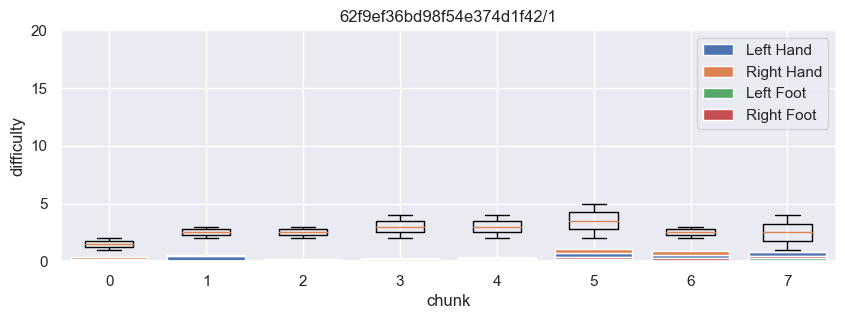

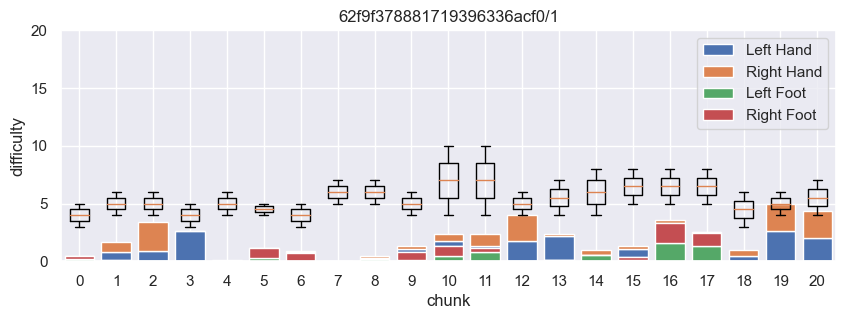

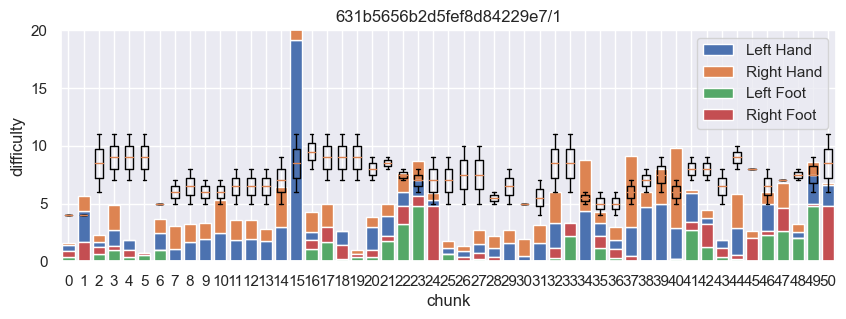

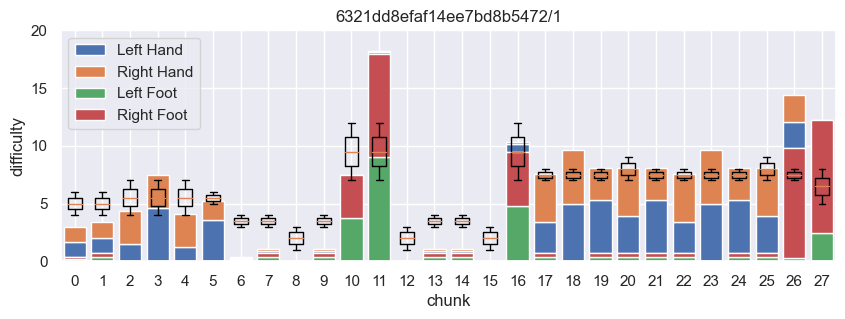

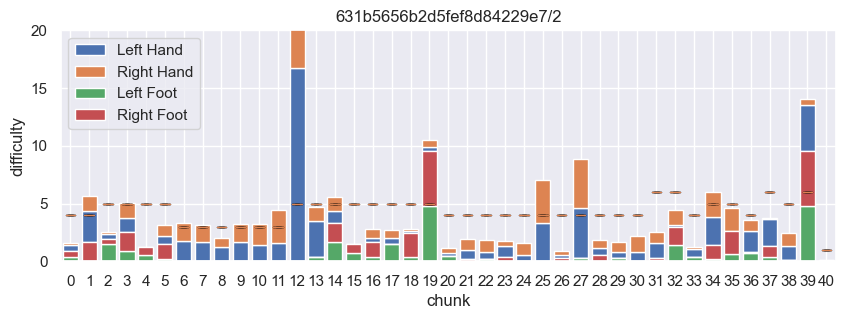

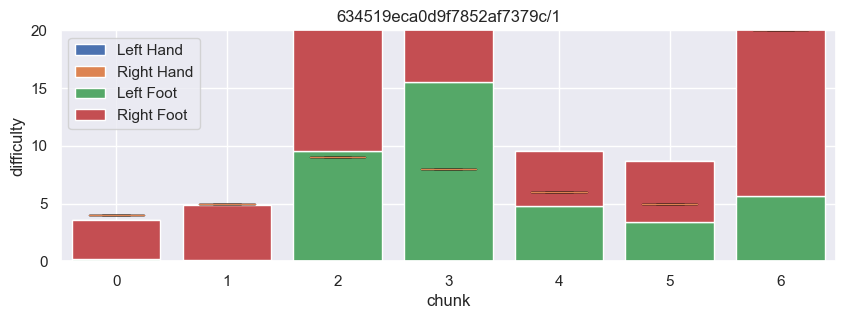

In [30]:
jumpThresholdH = -0.8
jumpThresholdT = 0.5
maxJumpHeight = 1.616
maxJumpSpeed = (2 * maxJumpHeight * gravity) ** 0.5

def handsHeightDifficultyFactor(height):
  return (1.2 * height - 0.4) ** 4 - (0.2 * height) ** 6 + 0.2


def feetHeightDifficultyFactor(height):
  return ((height + 0.875) ** 2.8 + 1)

def jumpHeightDifficulty(height):
  return 10 * (height + 1) ** 3 + 3

def intensity3(obj, lastPositions, state):
  distance = ((lastPositions[obj[3]][0] - obj[0]) ** 2 + (lastPositions[obj[3]][1] - obj[1]) ** 2) ** 0.5
  time = abs(lastPositions[obj[3]][2] - obj[2])


  # Hands
  if (obj[3] == 6 or obj[3] == 7):
    # Edge cases
    if (distance == 0):
      return 0, {}
    if (time == 0):
      return math.inf, {}
    return distance / time * handsHeightDifficultyFactor(obj[1]), {}
  # Feet
  elif (obj[3] == 8 or obj[3] == 9):
    otherFoot = lastPositions[9 if obj[3] == 8 else 8]
    
    if (state.get('status') == 'jump_start'):
      t = obj[2] - otherFoot[2]

      # Check if landing was impossible
      # if otherFoot[1] - 0.5 * gravity * t ** 2 > obj[1]:
      #   # todo
      #   print('todo')
      #   return distance / time * feetHeightDifficultyFactor(obj[1])

    # detect jump
    if (obj[1] > jumpThresholdH and 
        otherFoot[1] > jumpThresholdH and
        obj[2] - otherFoot[2] < jumpThresholdT): # this line could cause counting too many jumps, if jump_start case is not handled above
      # todo: Allow some backtracking in order to get consistent intensities for jumps?
      # todo: Think about monkey patching difficulty of otherFoot instead of just returning higher difficulty for one foot for more balanced feet intensity.
      # Not important for overall difficulty. Probably not worth the effort.
      return jumpHeightDifficulty(obj[1]), {
        'status': 'jump_start'
      }

    # # default (standing) evaluation
    # Edge cases
    if (distance == 0):
      return 0, {}
    if (time == 0):
      return math.inf, {}
    return distance / time * feetHeightDifficultyFactor(obj[1]), {}
  return math.inf, 0

plotSampledGetMinIntensityDijkstra(intensity3)